In [454]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

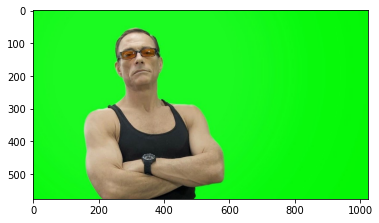

In [455]:
bgr_img = cv2.imread('input/vandamme3.jpg')
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

In [456]:
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(hsv_img)

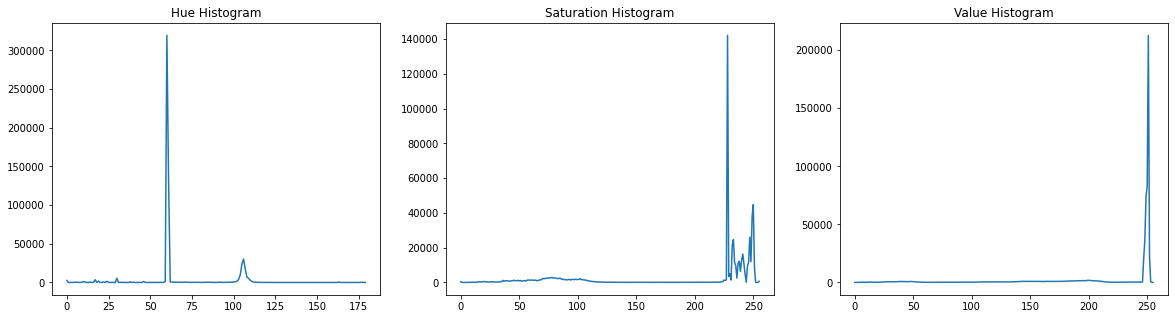

In [457]:
def generate_np_histogram(values, bins=256):
  histogram, _ = np.histogram(values, bins)
  return histogram

plt.figure(figsize=[20, 5])

plt.subplot(131)
plt.plot(generate_np_histogram(h_channel, 180))
plt.title('Hue Histogram')

plt.subplot(132)
plt.plot(generate_np_histogram(s_channel))
plt.title('Saturation Histogram')

plt.subplot(133)
plt.plot(generate_np_histogram(v_channel))
plt.title('Value Histogram')

plt.show()

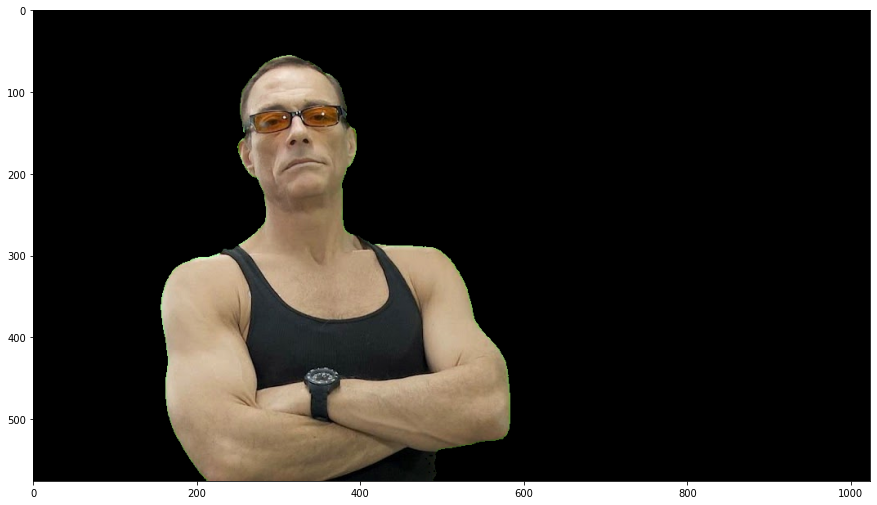

In [458]:
lower_boundary = np.array([40, 100, 20])
upper_boundary = np.array([70, 256, 256])

mask = cv2.inRange(hsv_img, lower_boundary, upper_boundary)
inverted_mask = cv2.bitwise_not(mask)

masked_hsv_img = cv2.bitwise_and(hsv_img, hsv_img, mask=inverted_mask)

plt.figure(1, figsize=(15, 15))
plt.imshow(cv2.cvtColor(masked_hsv_img, cv2.COLOR_HSV2BGR))


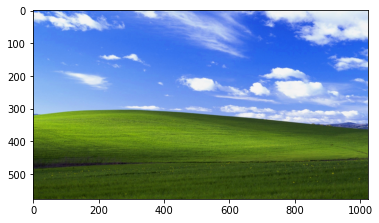

In [459]:
bgr_background_img = cv2.imread('input/background-2.jpg')
hsv_background_img = cv2.cvtColor(bgr_background_img, cv2.COLOR_BGR2HSV)

aspect_ratio = masked_hsv_img.shape[1] / hsv_background_img.shape[1]
new_size = (masked_hsv_img.shape[1], int(hsv_background_img.shape[0] * aspect_ratio))

hsv_background_img = cv2.resize(hsv_background_img, new_size, interpolation=cv2.INTER_AREA)

plt.imshow(cv2.cvtColor(hsv_background_img, cv2.COLOR_HSV2RGB))

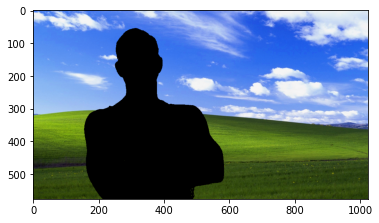

In [460]:
new_img_background = cv2.bitwise_and(hsv_background_img, hsv_background_img, mask=mask)
plt.imshow(cv2.cvtColor(new_img_background, cv2.COLOR_HSV2RGB))

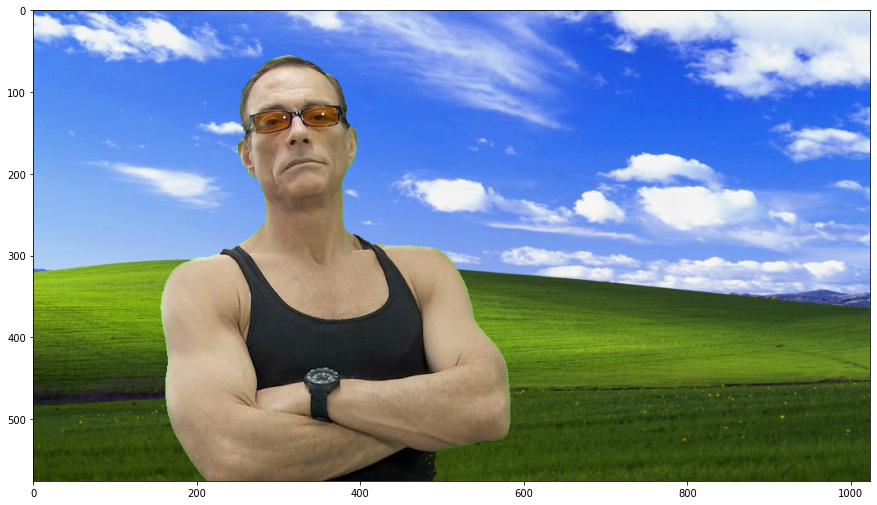

In [461]:
new_img = cv2.add(cv2.cvtColor(new_img_background, cv2.COLOR_HSV2RGB), cv2.cvtColor(masked_hsv_img, cv2.COLOR_HSV2BGR))


plt.figure(2, figsize=(15, 15))
plt.imshow(new_img)